In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
s = 200
a = -2.5
b = 2
x1 = (b - a) * np.random.random_sample((s,)) + a
a = 1.5
b = 4
y1 = (b - a) * np.random.random_sample((s,)) + a
s = 30
a = -2.5
b = -2
x2 = (b - a) * np.random.random_sample((s,)) + a
a = 1.5
b = 11
y2 = (b - a) * np.random.random_sample((s,)) + a
s = 20
a = -2.5
b = 1.5
x3 = (b - a) * np.random.random_sample((s,)) + a
a = 1.5
b = 9.5
y3 = (b - a) * np.random.random_sample((s,)) + a

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


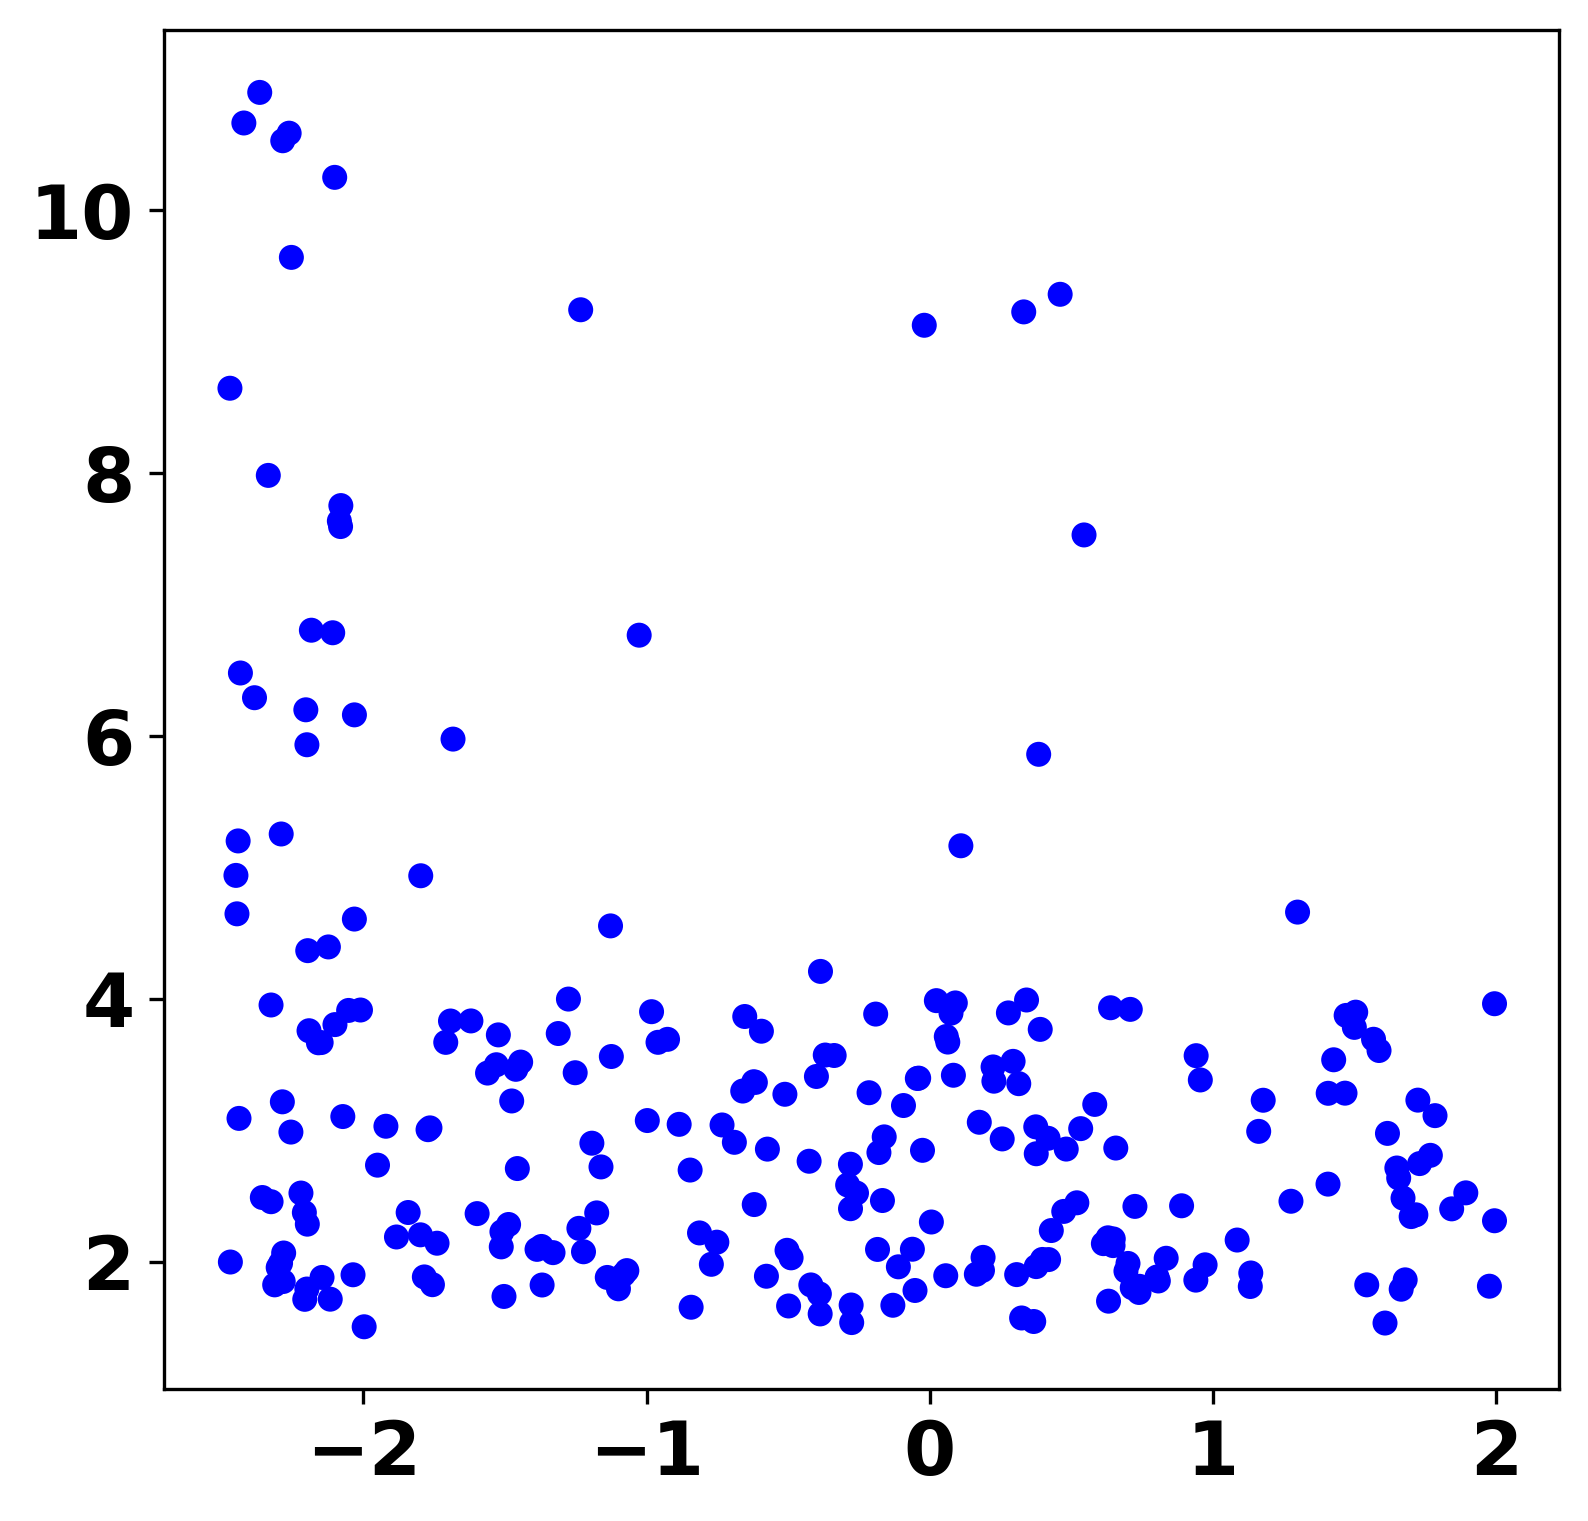

In [5]:
font = {'weight' : 'bold', 'size'   : 18}
plt.rc('font', **font)
fig = plt.figure(figsize=(6, 6), dpi=300)
ax = fig.add_subplot(111)
ax.scatter(x1, y1, c='b', edgecolor='')
ax.scatter(x2, y2, c='b', edgecolor='')
ax.scatter(x3, y3, c='b', edgecolor='')
fig.savefig('raw.png', dpi=300)

In [6]:
def generate_matrix(seq):
    seq_matrix = np.zeros((4, len(seq)))
    for j in range(len(seq)):
        if seq[j] == 'A':
            seq_matrix[0,j] = 1
        elif seq[j] == 'C':
            seq_matrix[1,j] = 1
        elif seq[j] == 'G':
            seq_matrix[2,j] = 1
        elif seq[j] == 'T':
            seq_matrix[3,j] = 1
    return seq_matrix
def get_PSAM_score(sequence, score_matrix):
    score = 0
    score_len = score_matrix.shape[0]
    for j in range(len(sequence) - score_len + 1):
        seq_matrix = generate_matrix(sequence[j:j+score_len])
        diagonal = np.diagonal(np.matmul(score_matrix,seq_matrix))
        score += np.prod(diagonal)
    return score
def get_PWM_score(sequence, score_matrix):
    score = 0
    score_len = score_matrix.shape[0]
    for j in range(len(sequence) - score_len + 1):
        seq_matrix = generate_matrix(sequence[j:j+score_len])
        diagonal = np.diagonal(np.matmul(score_matrix,seq_matrix))
        score = np.maximum(score, np.sum(diagonal))
    return score

def ddG(Kd1, Kd2, R=1.9872036e-3, T=295):
    return R*T*np.log(Kd2/Kd1)

In [7]:
import csv
import numpy as np

lines = []
with open('../data/experimental/PSAMs/PHO4_PSAM_MaerklQuake2007.csv') as handle:
    reader = csv.reader(handle)
    for row in reader:
        lines.append(row)
PHO4_PSAM = np.array(lines)[1:,1:].T.astype('float')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


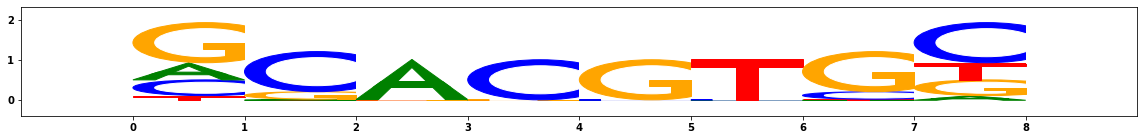

In [8]:
import matplotlib
from deeplift.visualization import viz_sequence
%matplotlib inline

viz_sequence.plot_weights(PHO4_PSAM)

In [9]:
PHO4_ddG = [[-ddG(x,1) for x in j] for j in PHO4_PSAM]
PHO4_ddG = np.array([i-np.mean(i) for i in PHO4_ddG])

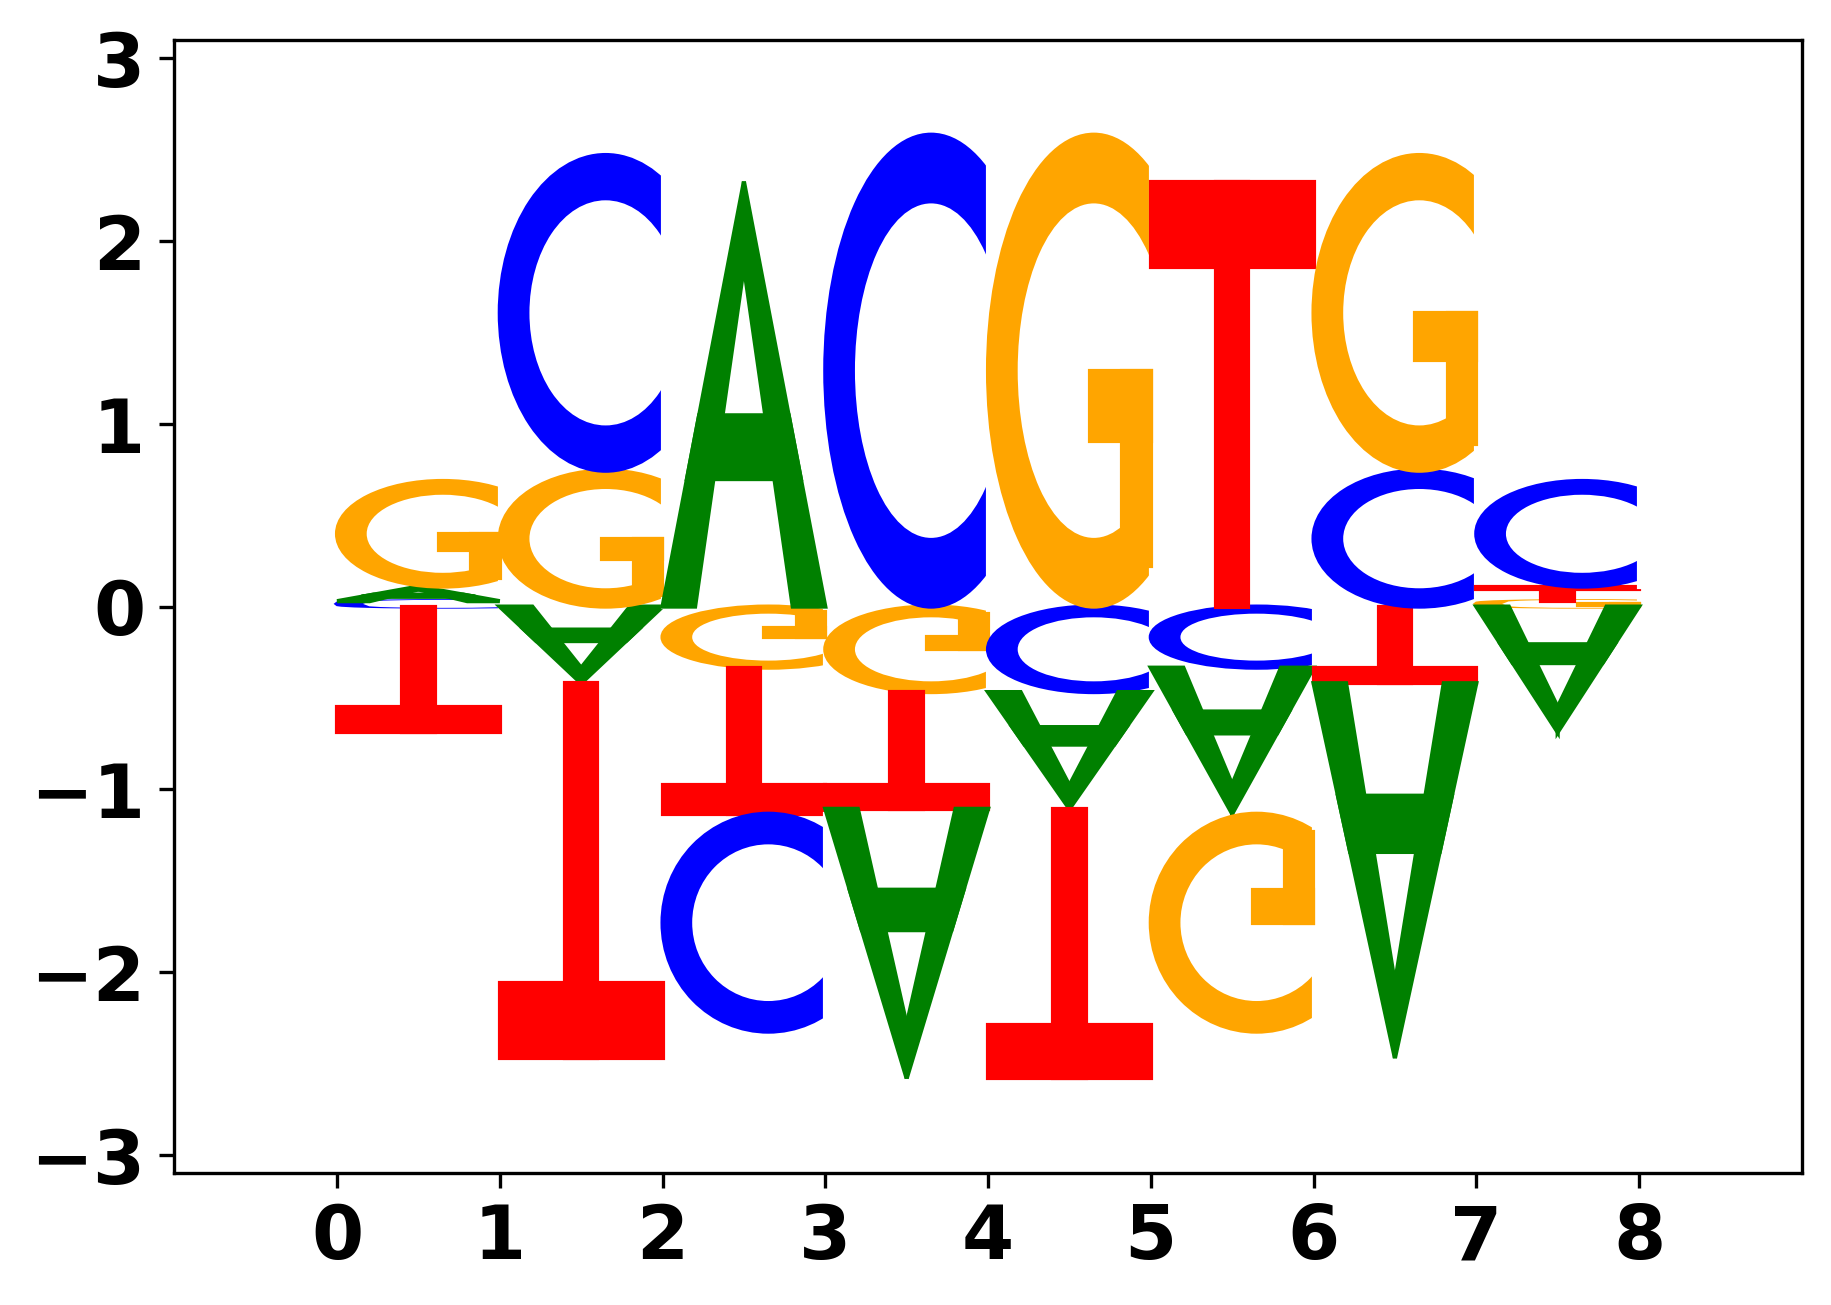

In [14]:
plt.rc('font', **font)
fig = plt.figure(figsize=(7,5), dpi=300)
ax = fig.add_subplot(111)
viz_sequence.plot_weights_given_ax(ax, PHO4_ddG,
                                    height_padding_factor=0.2,
                                    length_padding=1.0,
                                    subticks_frequency=1.0,
                                    highlight={})
fig.savefig('energy_matrix.png', dpi=300)

In [43]:
s = 300
a = -2.7
b = -1.1
x1 = (b - a) * np.random.random_sample((s,)) + a
a = 1.5
b = 4
y1 = (b - a) * np.random.random_sample((s,)) + a

In [44]:
s = 60
a = -2.7
b = -2.5
x2 = (b - a) * np.random.random_sample((s,)) + a
a = 1.5
b = 11
y2 = (b - a) * np.random.random_sample((s,)) + a

In [45]:
s = 60
a = -2.7
b = -1.5
x3 = (b - a) * np.random.random_sample((s,)) + a
a = 1.5
b = 9
y3 = (b - a) * np.random.random_sample((s,)) + a

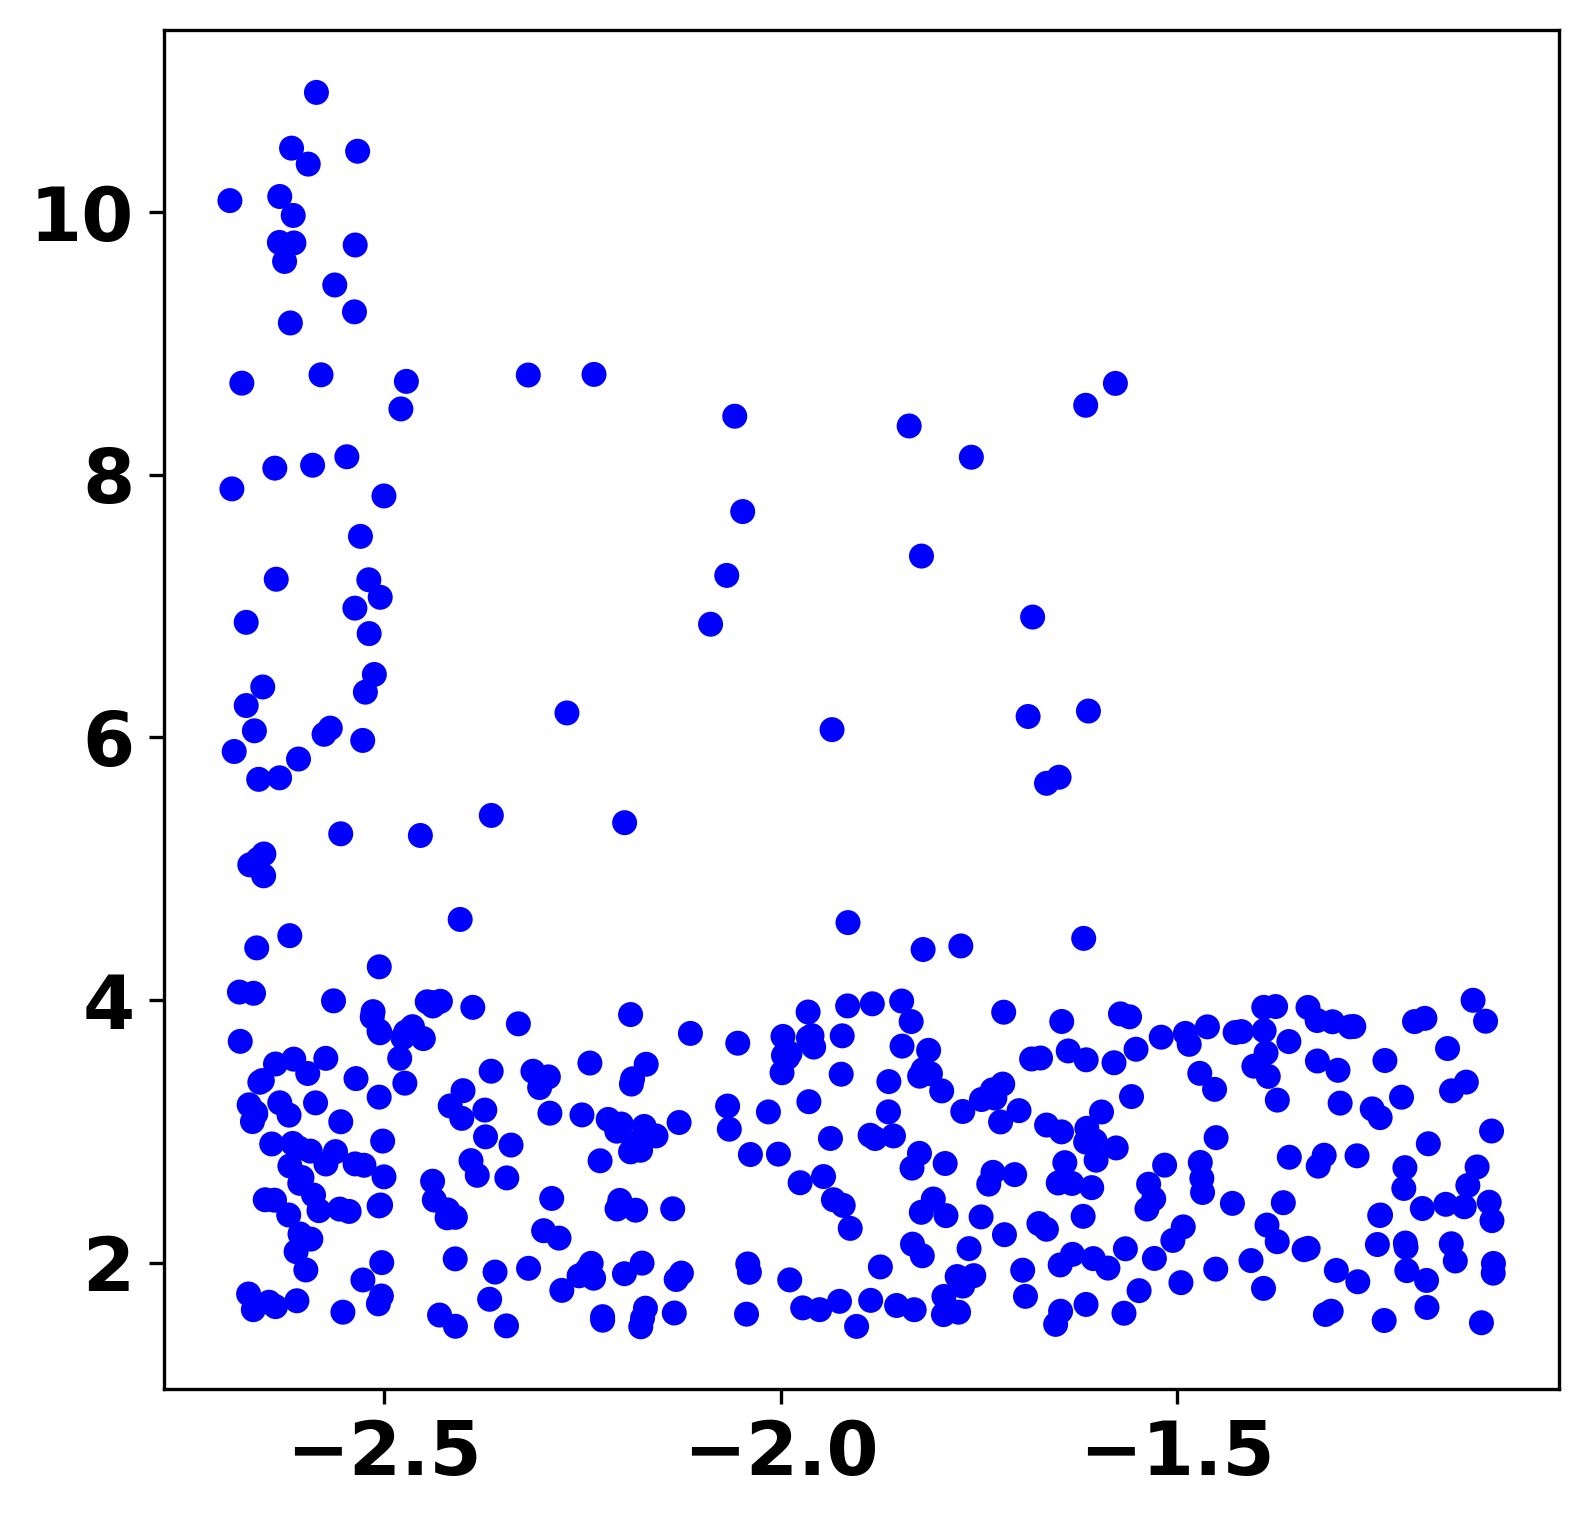

In [46]:
plt.rc('font', **font)
fig = plt.figure(figsize=(6, 6), dpi=300)
ax = fig.add_subplot(111)
ax.scatter(x1, y1, c='b', edgecolor='')
ax.scatter(x2, y2, c='b', edgecolor='')
ax.scatter(x3, y3, c='b', edgecolor='')
fig.savefig('linear.png', dpi=300)

In [97]:
mean = (0, 1)
cov = [[1, -1000], [0, 1]]
x = np.random.multivariate_normal(mean, cov, (10000,))

/users/amr1/miniconda3/envs/basepair/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  app.launch_new_instance()


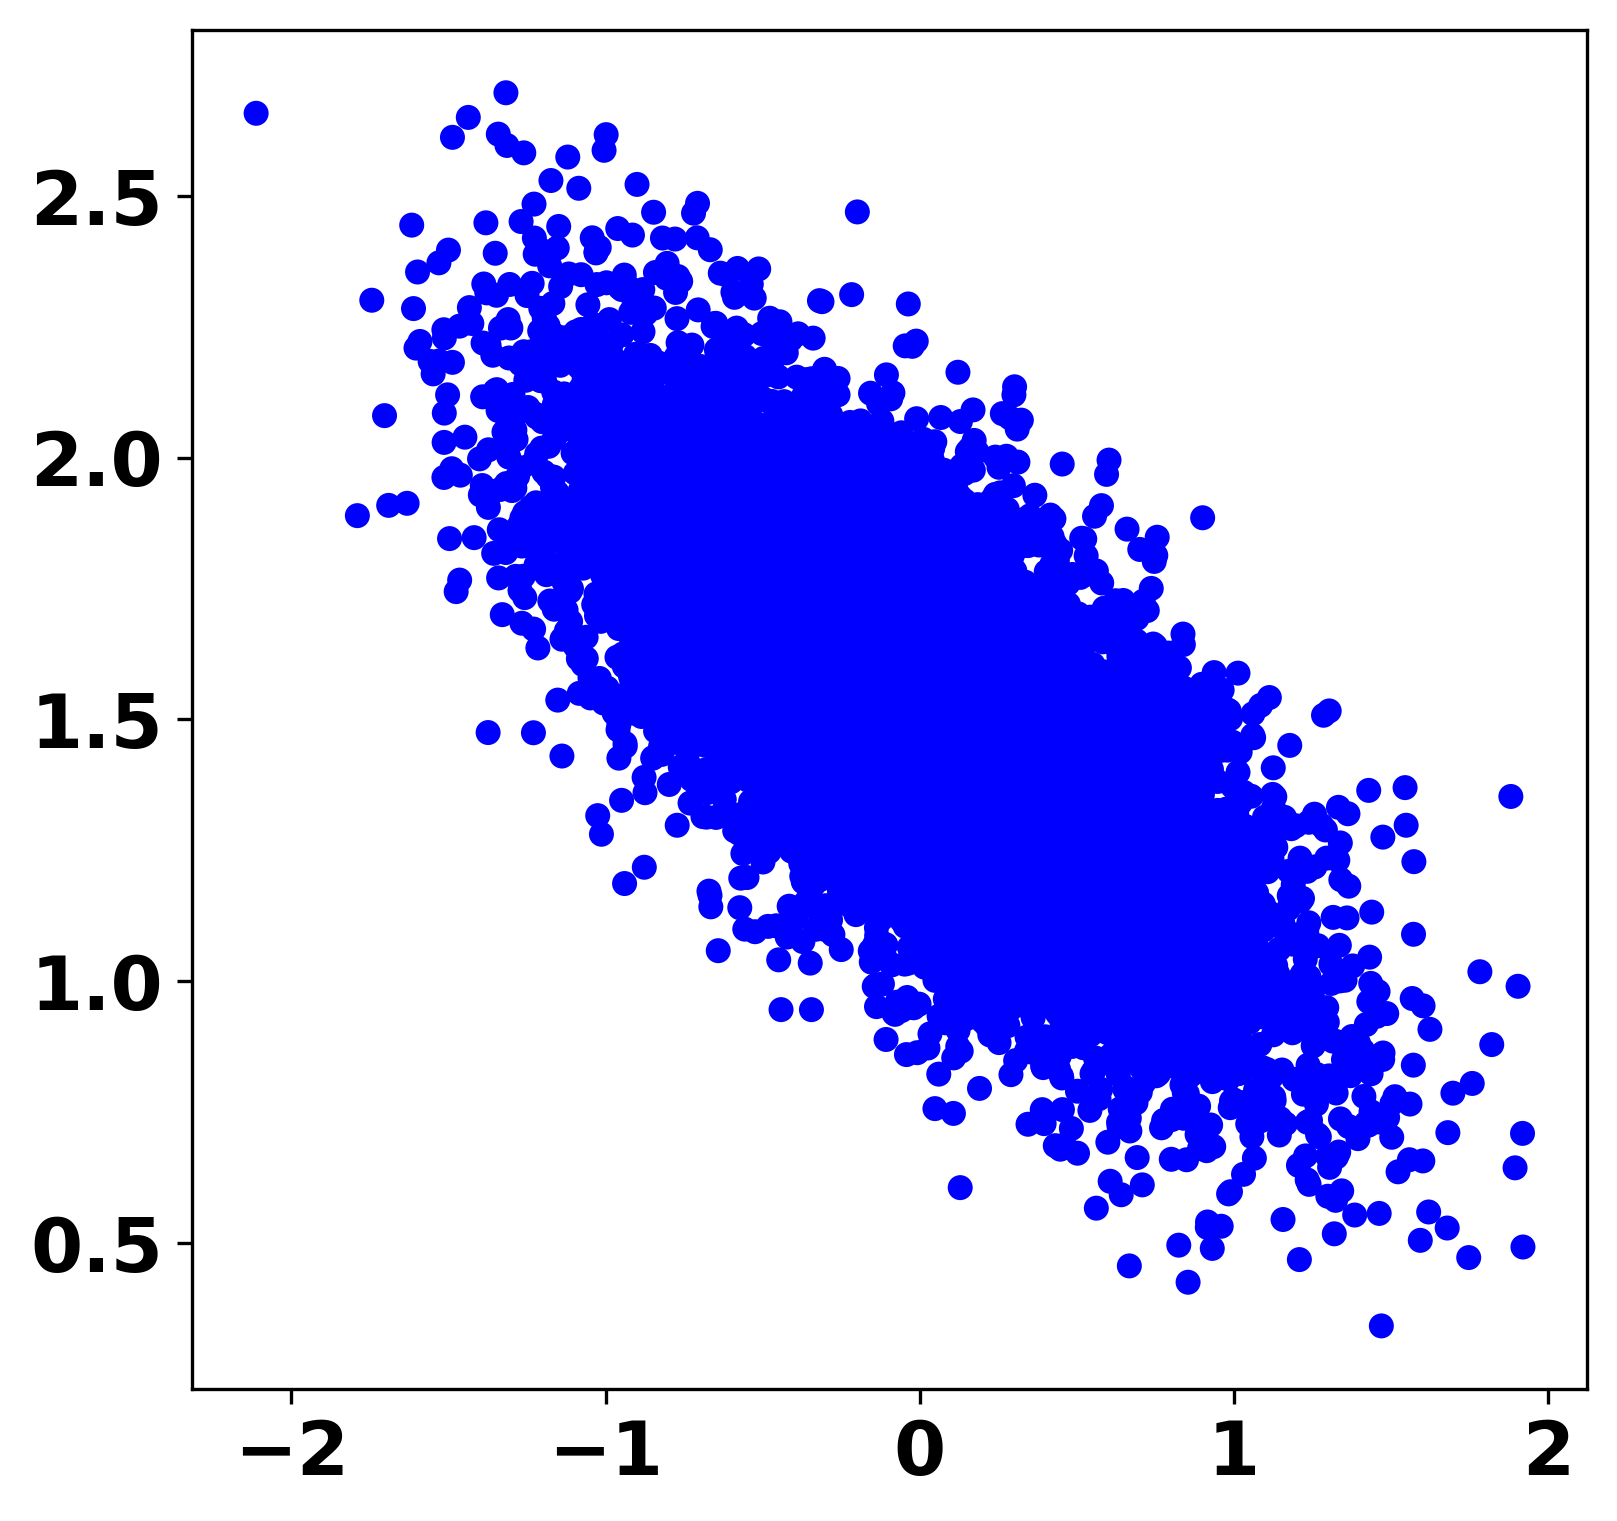

In [99]:
plt.rc('font', **font)
fig = plt.figure(figsize=(6, 6), dpi=300)
ax = fig.add_subplot(111)
ax.scatter(x[:,0]*12, (x[:,1]+150)/100, c='b', edgecolor='')
fig.savefig('overview_final.png', dpi=300)